# Multi-Pool CEST simulation with JEMRIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jemris_bmc_sim as js
import configparser

#### Define multi pool sample

In [2]:
# pool parameters
"""
kb          exchange rate [kHz]
dwb         frequency offset related to water [ppm]
fb          relative proton fraction M0b/M0a 
T1          T1 values of water and pools [ms]   
T2          T2 values of water and pools [ms]
"""

# exchangeable pools
pool1 = {"kb":  0.5,
         "dwb": 30,
         "fb":  .0005,
         "T1":  100,
         "T2":  50}

pool2 = {"kb":  1,
         "dwb": 15,
         "fb":  .001,
         "T1":  90,
         "T2":  40}

# water pool
water_T1 = 1000
water_T2 = 100

# scanner parameters
B0          = 7               # static magnetic field [T]

### Build multi pool sample

Input via python
- parameters of the exchangeable pools
- T1 and T2 values of water [ms]
- field strength B0 [T]

Output saved in the current working directory
- mpsample.h5 hdf5 file with all

In [3]:
js.mpsample([pool1,pool2],water_T1,water_T2,B0)

## Run JEMRIS simulation

#### Define simulation parameter

In [4]:
# scanner parameters
try: B0                   # static magnetic field [T]  (corresponding to mpsample definition) 
except NameError: B0 = 7 
    
# sequence parameters  
# only for cw labeling scheme
td     = 1000               # pulse duration [ms]     
B1     = 5                 # B1 amplitude [µT]

# only for  arbitrary labeling scheme
sequence = 'mt_pulsed.xml'

# z-spectrum parameters
f_max = 45                  # maximum frequency [ppm]
n_freq = 101                 # number of frequencies     

FREQ = np.linspace(-f_max,f_max,n_freq)

# simulation parameters
n_p     = 4        # number of processes (if None: half of the available kernels)
verbose = True     # if True: show plot          

### CW simulation

_Variable sequence parameters:_ pulse duration td and pulse amplitude B1

 Script will change these parameters in the sequence xml-template
 
 ##### Required files in the working directory
 - mpsample.h5 :    multi pool sample
 - mt_rect.xml.form : sequence template - simu_bmc.xml :    simulation file

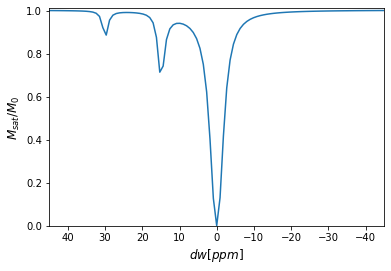

In [5]:
Z = js.run_cw_sim(td,B1,FREQ,B0,n_p,verbose)

### Simulation with arbitrary labeling scheme
The sequence xml-file need to be defined in advance

##### Required files in the working directory
 - mpsample.h5 :    multi pool sample
 - mt_pulsed.xml : sequence file
 - simu_bmc.xml :    simulation file

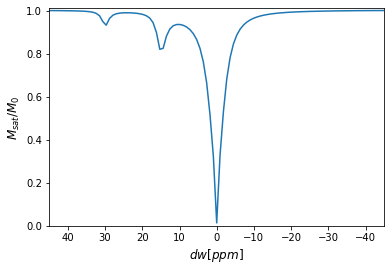

In [6]:
Z = js.run_sim(sequence,FREQ,B0,n_p,verbose)

## Examples

#### using the CW simulation
##### Required files in the working directory
 - mpsample.h5 :    multi pool sample
 - mt_rect.xml.form : sequence template
 - simu_bmc.xml :    simulation file

### Variation of B1


In [7]:
Z1 = js.run_cw_sim(td,1,FREQ,B0,n_p,0)
Z2 = js.run_cw_sim(td,5,FREQ,B0,n_p,0)
Z3 = js.run_cw_sim(td,10,FREQ,B0,n_p,0)
Z4 = js.run_cw_sim(td,15,FREQ,B0,n_p,0)
Z5 = js.run_cw_sim(td,25,FREQ,B0,n_p,0)

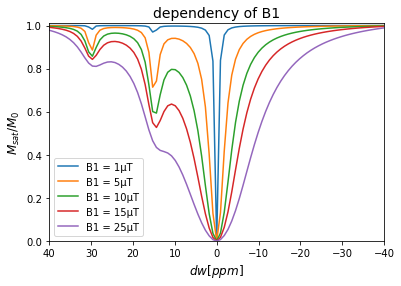

In [8]:
plt.figure()
plt.plot(FREQ, Z1/Z1[0], label='B1 = 1µT')
plt.plot(FREQ, Z2/Z2[0], label='B1 = 5µT')
plt.plot(FREQ, Z3/Z3[0], label='B1 = 10µT')
plt.plot(FREQ, Z4/Z4[0], label='B1 = 15µT')
plt.plot(FREQ, Z5/Z5[0], label='B1 = 25µT')
plt.xlabel('$dw [ppm]$',size=12)
plt.ylabel('$M_{sat}/M_0$',size=12)
plt.title('dependency of B1',size=14)
plt.ylim([0,1.01])
plt.xlim([40,-40])
plt.legend();

### Variation of B0

In [9]:
B0=1.5
js.mpsample([pool1,pool2],water_T1,water_T2,B0)
Z_1 = js.run_cw_sim(td,B1,FREQ,B0,n_p,0)

B0=3
js.mpsample([pool1,pool2],water_T1,water_T2,B0)
Z_2 = js.run_cw_sim(td,B1,FREQ,B0,n_p,0)

B0=7
js.mpsample([pool1,pool2],water_T1,water_T2,B0)
Z_3 = js.run_cw_sim(td,B1,FREQ,B0,n_p,0)

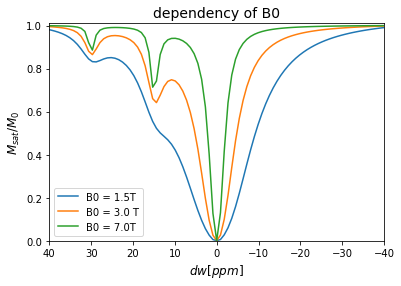

In [10]:
plt.figure()
plt.plot(FREQ, Z_1/Z_1[0],label='B0 = 1.5T')
plt.plot(FREQ, Z_2/Z_2[0],label='B0 = 3.0 T')
plt.plot(FREQ, Z_3/Z_3[0],label='B0 = 7.0T')
plt.xlabel('$dw [ppm]$',size=12)
plt.ylabel('$M_{sat}/M_0$',size=12)
plt.title('dependency of B0',size=14)
plt.ylim([0,1.01])
plt.xlim([40,-40])
plt.legend();